In [38]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

class Node:
    def __init__(self,value,level) :
        self.value = value
        self.forward = [None] * (level + 1)

In [30]:
class SkipList:
    def __init__(self, max_level, x):
        self.max_level = max_level
        self.level = 0
        self.x = x 
        self.header = Node(-1, self.max_level)
    
    def random_level(self):
        level = 0
        while random.random() < 1/self.x and level < self.max_level:
            level += 1
        return level
    
    def search(self,value):
        current = self.header
        for i in range(self.level,-1,-1):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
        
        current = current.forward[0]

        if current and current.value == value:
            return True
        return False
    
    def insert(self,value):
        update = [None] * (self.max_level + 1)
        current = self.header

        for i in range(self.level,-1,-1):
            while current.forward[i] and current.forward[i].value < value:
                current  = current.forward[i]
            update[i] = current

        new_level = self.random_level()

        if new_level > self.level:
            for i in range (self.level + 1, new_level + 1):
                update[i] = self.header
            self.level = new_level


        new_node =Node(value,new_level)

        for i in range (new_level+1):
            new_node.forward[i] = update[i].forward[i]
            update[i].forward[i] = new_node
    
    def delete(self,value):
        update = [None] * (self.max_level + 1)
        current = self.header

        for i in range(self.level, -1,-1):
            while current.forward[i] and current.forward[i].value < value:
                current = current.forward[i]
            update[i] = current
        
        current = current.forward[0]

        if current and current.value == value:
            for i in range(self.level + 1):
                if update[i].forward[i] != current:
                    break
                update[i].forward[i] = current.forward[i]
            while self.level > 0 and self.header.forward[self.level] is None:
                self.level -=1


In [24]:
def measure_speed(skip_list, values_to_test):
    start_time = time.time()
    
    # Insert elements
    for value in values_to_test:
        skip_list.insert(value)
    insert_time = time.time() - start_time

    start_time = time.time()
    
    # Search elements
    for value in values_to_test:
        skip_list.search(value)
    search_time = time.time() - start_time

    start_time = time.time()
    
    # Delete elements
    for value in values_to_test:
        skip_list.delete(value)
    delete_time = time.time() - start_time

    return insert_time, search_time, delete_time

In [25]:
def memory_consumption(skip_list):
    total_pointers = 0
    node = skip_list.header
    while node.forward[0] is not None:
        total_pointers += len(node.forward)
        node = node.forward[0]
    
    return total_pointers


Testing with x = 2 with n 10000
Insert time: 0.047461 seconds
Search time: 0.031339 seconds
Delete time: 0.031242 seconds
Memory (total pointers): 0
Testing with x = 4 with n 10000
Insert time: 0.047462 seconds
Search time: 0.031364 seconds
Delete time: 0.058965 seconds
Memory (total pointers): 0
Testing with x = 6 with n 10000
Insert time: 0.051092 seconds
Search time: 0.048878 seconds
Delete time: 0.076736 seconds
Memory (total pointers): 0
Testing with x = 8 with n 10000
Insert time: 0.092963 seconds
Search time: 0.040425 seconds
Delete time: 0.039948 seconds
Memory (total pointers): 0
Testing with x = 2 with n 100000
Insert time: 0.116349 seconds
Search time: 0.039884 seconds
Delete time: 0.044286 seconds
Memory (total pointers): 0
Testing with x = 4 with n 100000
Insert time: 0.022106 seconds
Search time: 0.020382 seconds
Delete time: 0.021905 seconds
Memory (total pointers): 0
Testing with x = 6 with n 100000
Insert time: 0.023315 seconds
Search time: 0.021260 seconds
Delete time

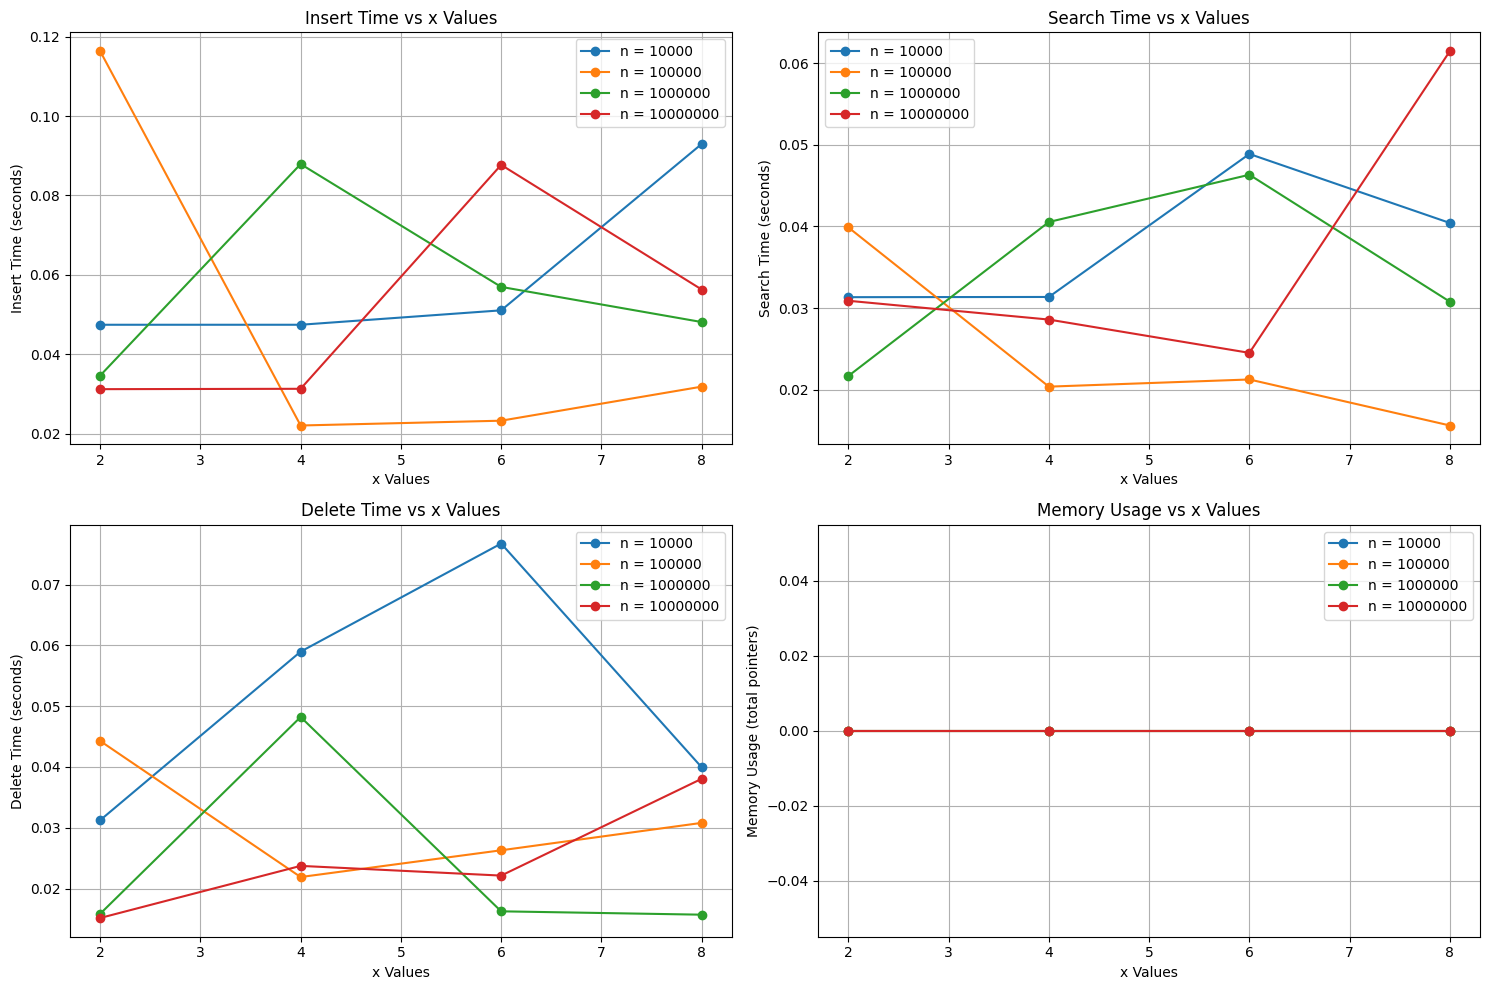

In [37]:
def experiment(maxRange):
    values_to_test = random.sample(range(maxRange), 10000)  
    x_values = [2, 4, 6, 8]
    
    insert_times = []
    search_times = []
    delete_times = []
    memory_usages = []

    for x in x_values:
        skip_list = SkipList(max_level=16, x=x)
        print(f"Testing with x = {x} with n {maxRange}")

        # Measure speed
        insert_time, search_time, delete_time = measure_speed(skip_list, values_to_test)
        insert_times.append(insert_time)
        search_times.append(search_time)
        delete_times.append(delete_time)

        print(f"Insert time: {insert_time:.6f} seconds")
        print(f"Search time: {search_time:.6f} seconds")
        print(f"Delete time: {delete_time:.6f} seconds")

        # Measure memory consumption
        total_pointers = memory_consumption(skip_list)
        memory_usages.append(total_pointers)
        print(f"Memory (total pointers): {total_pointers}")

        print("="*30)

    return insert_times, search_times, delete_times, memory_usages

# Run the experiments for different ranges
ranges = [10000, 100000, 1000000, 10000000]
all_insert_times = []
all_search_times = []
all_delete_times = []
all_memory_usages = []

for r in ranges:
    insert_times, search_times, delete_times, memory_usages = experiment(r)
    all_insert_times.append(insert_times)
    all_search_times.append(search_times)
    all_delete_times.append(delete_times)
    all_memory_usages.append(memory_usages)

# Plotting the results
x_labels = [2, 4, 6, 8]

plt.figure(figsize=(15, 10))

# Plot Insert Times
plt.subplot(2, 2, 1)
for i, r in enumerate(ranges):
    plt.plot(x_labels, all_insert_times[i], marker='o', label=f'n = {r}')
plt.title('Insert Time vs x Values')
plt.xlabel('x Values')
plt.ylabel('Insert Time (seconds)')
plt.legend()
plt.grid()

# Plot Search Times
plt.subplot(2, 2, 2)
for i, r in enumerate(ranges):
    plt.plot(x_labels, all_search_times[i], marker='o', label=f'n = {r}')
plt.title('Search Time vs x Values')
plt.xlabel('x Values')
plt.ylabel('Search Time (seconds)')
plt.legend()
plt.grid()

# Plot Delete Times
plt.subplot(2, 2, 3)
for i, r in enumerate(ranges):
    plt.plot(x_labels, all_delete_times[i], marker='o', label=f'n = {r}')
plt.title('Delete Time vs x Values')
plt.xlabel('x Values')
plt.ylabel('Delete Time (seconds)')
plt.legend()
plt.grid()

# Plot Memory Usage
plt.subplot(2, 2, 4)
for i, r in enumerate(ranges):
    plt.plot(x_labels, all_memory_usages[i], marker='o', label=f'n = {r}')
plt.title('Memory Usage vs x Values')
plt.xlabel('x Values')
plt.ylabel('Memory Usage (total pointers)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [45]:
average_insert_times = np.mean(all_insert_times, axis=0)
average_search_times = np.mean(all_search_times, axis=0)
average_delete_times = np.mean(all_delete_times, axis=0)
average_memory_usages = np.mean(all_memory_usages, axis=0)

weights = {
    'insert': 0.4,
    'search': 0.4,
    'delete': 0.1,
    'memory': 0.1,
}

scores = []
for i in range(len(x_labels)):
    score = (weights['insert'] * (1 / average_insert_times[i]) +
             weights['search'] * (1 / average_search_times[i]) +
             weights['delete'] * (1 / average_delete_times[i]) +
             weights['memory'] * (1 / average_memory_usages[i]))
    scores.append(score)

best_x_index = np.argmax(scores)
best_x = x_labels[best_x_index]

print(f"Best x for the above mentioned input is {best_x}")

best x for the above mentioned input is 2


C:\Users\jayak\AppData\Local\Temp\ipykernel_14428\1138319327.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  weights['memory'] * (1 / average_memory_usages[i]))
